In [1]:
%config InlineBackend.figure_format = "svg"

from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

## Import data and model

In [2]:
# Import data
y_train = pd.read_csv("data/train.csv", index_col="date")
y_train.index = pd.to_datetime(y_train.index, format="%Y-%m-%d")
y_test = pd.read_csv("data/test.csv", index_col="date")
y_test.index = pd.to_datetime(y_test.index, format="%Y-%m-%d")
y_test

,tavg,tmin,tmax,wdir,wspd,pres
date,,,,,,
2022-09-28,14.1,10.7,17.3,228.0,12.1,1003.2
2022-09-29,14.4,12.3,17.0,295.0,6.2,1003.5
2022-09-30,14.5,11.7,17.1,327.0,8.9,1010.7
2022-10-01,15.1,13.0,17.9,332.0,9.9,1014.0
2022-10-02,15.4,13.5,17.9,281.0,21.4,1017.0
2022-10-03,14.1,12.4,15.5,299.0,23.5,1018.0
2022-10-04,13.1,10.3,15.9,303.0,16.5,1022.1
2022-10-05,12.1,7.0,17.7,139.0,6.8,1027.8
2022-10-06,13.6,8.2,19.7,348.0,4.8,1029.0


In [3]:
# Import model pipeline
with open("models/naive-seasonal.pkl", "rb") as f:
    pipeline = pickle.load(f)
pipeline

TransformedTargetForecaster(steps=[('interpolator', Imputer(method='linear')),
                                   ('detrender', Detrender()),
                                   ('forecaster', NaiveForecaster(sp=365))])

## Plot model forecasts

Now that we have a trained model at out disposal, let's make forecasts and visually compare them to the true values:

In [4]:
# Point forecasts
y_test_pred = pipeline.predict()
y_test_pred.index = pd.to_datetime(y_test_pred.index.to_timestamp(), format="%Y-%m-%d")
y_test_pred

,tavg,tmin,tmax,wdir,wspd,pres
date,,,,,,
2022-09-28,20.120504,16.670094,24.548046,314.475168,9.947587,1018.662759
2022-09-29,16.820504,15.170094,19.648046,66.475168,6.047587,1021.762759
2022-09-30,15.520504,12.270094,17.148046,291.475168,7.747587,1026.162759
2022-10-01,14.320504,9.670094,18.948046,43.475168,5.347587,1027.762759
2022-10-02,15.720504,11.270094,20.248046,179.475168,7.347587,1023.962759
2022-10-03,15.620504,8.670094,21.648046,170.475168,8.047587,1021.062759
2022-10-04,18.020504,12.170094,25.448046,130.475168,7.747587,1020.462759
2022-10-05,18.320504,12.970094,24.548046,155.475168,10.047587,1019.062759
2022-10-06,13.720504,11.970094,17.648046,104.475168,9.947587,1020.362759


In [5]:
# Quantile forecasts
y_test_quantiles = pipeline.predict_quantiles(alpha=[0.025,0.1,0.9,0.975])
y_test_quantiles.index = pd.to_datetime(y_test_quantiles.index.to_timestamp(), format="%Y-%m-%d")
y_test_quantiles

,tavg,tmin,tmax,wdir,wspd,pres,tavg,tmin,tmax,wdir,...,tmax,wdir,wspd,pres,tavg,tmin,tmax,wdir,wspd,pres
,0.025,0.025,0.025,0.025,0.025,0.025,0.100,0.100,0.100,0.100,...,0.900,0.900,0.900,0.900,0.975,0.975,0.975,0.975,0.975,0.975
date,,,,,,,,,,,,,,,,,,,,,
2022-09-28,10.913159,8.034576,12.958427,-10.44881,-1.430792,997.528913,14.100145,11.023632,16.970001,102.018798,...,32.126091,526.931538,17.387509,1032.481438,29.327848,25.305612,36.137666,639.399147,21.325966,1039.796605
2022-09-29,7.613159,6.534576,8.058427,-258.44881,-5.330792,1000.628913,10.800145,9.523632,12.070001,-145.981202,...,27.226091,278.931538,13.487509,1035.581438,26.027848,23.805612,31.237666,391.399147,17.425966,1042.896605
2022-09-30,6.313159,3.634576,5.558427,-33.44881,-3.630792,1005.028913,9.500145,6.623632,9.570001,79.018798,...,24.726091,503.931538,15.187509,1039.981438,24.727848,20.905612,28.737666,616.399147,19.125966,1047.296605
2022-10-01,5.113159,1.034576,7.358427,-281.44881,-6.030792,1006.628913,8.300145,4.023632,11.370001,-168.981202,...,26.526091,255.931538,12.787509,1041.581438,23.527848,18.305612,30.537666,368.399147,16.725966,1048.896605
2022-10-02,6.513159,2.634576,8.658427,-145.44881,-4.030792,1002.828913,9.700145,5.623632,12.670001,-32.981202,...,27.826091,391.931538,14.787509,1037.781438,24.927848,19.905612,31.837666,504.399147,18.725966,1045.096605
2022-10-03,6.413159,0.034576,10.058427,-154.44881,-3.330792,999.928913,9.600145,3.023632,14.070001,-41.981202,...,29.226091,382.931538,15.487509,1034.881438,24.827848,17.305612,33.237666,495.399147,19.425966,1042.196605
2022-10-04,8.813159,3.534576,13.858427,-194.44881,-3.630792,999.328913,12.000145,6.523632,17.870001,-81.981202,...,33.026091,342.931538,15.187509,1034.281438,27.227848,20.805612,37.037666,455.399147,19.125966,1041.596605
2022-10-05,9.113159,4.334576,12.958427,-169.44881,-1.330792,997.928913,12.300145,7.323632,16.970001,-56.981202,...,32.126091,367.931538,17.487509,1032.881438,27.527848,21.605612,36.137666,480.399147,21.425966,1040.196605


The `predict_quantiles` method returns a multiindex dataframe. The first level is the time-series names, the second level is the quantiles:

In [6]:
y_test_quantiles.columns.levels

FrozenList([['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres'], [0.025, 0.1, 0.9, 0.975]])

In [7]:
y_test_quantiles.columns.get_level_values(0)

Index(['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres', 'tavg', 'tmin', 'tmax',
       'wdir', 'wspd', 'pres', 'tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres',
       'tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres'],
      dtype='object')

In [8]:
y_test_quantiles.columns.get_level_values(1)

Float64Index([0.025, 0.025, 0.025, 0.025, 0.025, 0.025,   0.1,   0.1,   0.1,
                0.1,   0.1,   0.1,   0.9,   0.9,   0.9,   0.9,   0.9,   0.9,
              0.975, 0.975, 0.975, 0.975, 0.975, 0.975],
             dtype='float64')

We have collected the predictions! Let's plot them along with some of the previous training datapoints!

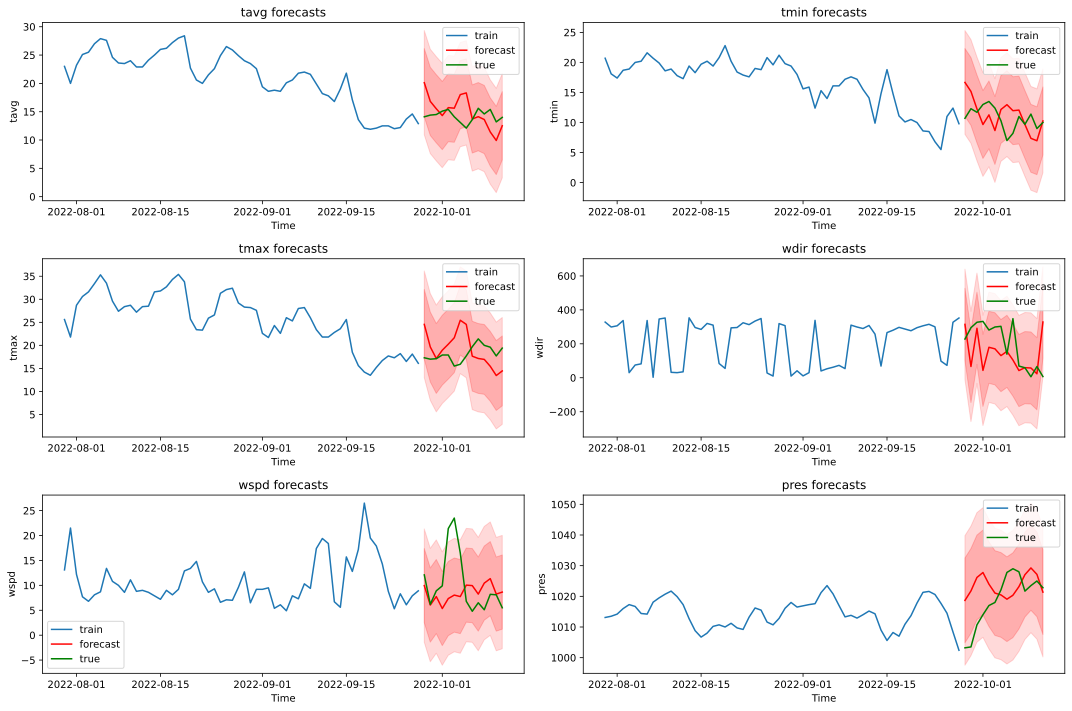

In [9]:
# Create maplotlib figure
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

# Iterate all features
for k, key in enumerate(y_test):
    
    # Get axis
    i, j = k // cols, k % cols
    ax = axs[i,j]
    
    # Get training data to plot (1 month before predictions)
    y_train_plot = y_train.iloc[-60:][key]
    
    # Plot the data
    ax.set_title(f"{key} forecasts")
    ax.plot(y_train_plot.index, y_train_plot, label="train")
    ax.plot(y_test_pred[key].index, y_test_pred[key], label="forecast", color="red")
    ax.fill_between(y_test_quantiles[key].index, y_test_quantiles[key, 0.025], y_test_quantiles[key, 0.975], color="red", alpha=0.15)
    ax.fill_between(y_test_quantiles[key].index, y_test_quantiles[key, 0.1], y_test_quantiles[key, 0.9], color="red", alpha=0.2)
    ax.plot(y_test[key].index, y_test[key], label="true", color="green")
    ax.set_ylabel(key)
    ax.set_xlabel("Time")
    
    # Format data ticks
    ax.xaxis.get_major_locator()
    
    ax.legend()
    
plt.tight_layout()
plt.show()

## Point forecast evaluation

To evaluate the point forecast prediction, we will use the MASE (mean absolute scaled error) for each time-series. This implies calculating the MAE for both our model and a simple Naive method (either seasonal or non-seasonal, depending on the time-series):
$$ MASE = \frac{MAE_{\text{model}}}{MAE_{\text{Naive}}} $$

In [10]:
# Define seasonal feature names
time_series_seasonal = ["tavg", "tmin", "tmax"]

results = {"Feature": [], "MASE": []}
for key in y_test:
    # Define periodicity of time-series
    sp = 365 if key in time_series_seasonal else 1
    
    # Get results
    mase = MeanAbsoluteScaledError(sp=sp)(y_test[key], y_test_pred[key], y_train=y_train[key].interpolate(method="linear"))
    results["Feature"].append(key)
    results["MASE"].append(mase)
    
results = pd.DataFrame(results)
results

,Feature,MASE
0,tavg,0.672302
1,tmin,0.788304
2,tmax,0.899881
3,wdir,1.461555
4,wspd,1.607334
5,pres,2.306454


As we can see from these results, applying a detrender makes our model considerably better than simply applying the Naive seasonal method for the temperature features, as their $MASE < 1$.

On the flip-side, using a non-seasonal Naive approach would be better for the non-seasonal time-series, as their $MASE > 1$, because their trended component is more important.

## Forecast distribution evaluation:

### Evaluating the quantiles:

The quantiles we defined will be evaluated using the pinball loss function. Given a significance $\alpha$, such that the model prediction for quantile $p = 1 - \alpha$ is given by $f_{p, t}$ at time $t$:

$$ Q_{p, t} = \left\{
    \begin{array}{ll}
        (1-p) (f_{p, t} - y_t) & y_t < f_{p, t}\\
        p (y_t - f_{p, t}) & y_t \ge f_{p, t}
    \end{array}
\right.    
$$

The lower the quantile score, the better the quantile value $f_{p, t}$.

In [11]:
def single_quantile_score(y_true, y_pred, p):
    if y_true < y_pred:
        r = (1 - p) * (y_pred - y_true)
    else:
        r = p * (y_true - y_pred)
    return r

def quantile_score(y_true, y_pred, p):
    foo = lambda y, y_: single_quantile_score(y, y_, p)
    r = np.array(list(map(foo, y_true, y_pred)))
    return r

In [12]:
# Define the quantiles:
quantiles = [0.025, 0.1, 0.9, 0.975]

# Iterate over time-series
results = {"Time-series": [], "Quantile": [], "MeanQuantileScore": []}
for key in y_test:
        
    # Calculate quantile score for each quantile
    for p in quantiles:
    
        # Calculate score for each time-step
        q_scores = quantile_score(y_test[key], y_test_quantiles[key, p], p)
        
        # Populate results
        results["Time-series"].append(key)
        results["Quantile"].append(p)
        results["MeanQuantileScore"].append(q_scores.mean())
        
results = pd.DataFrame(results)
results

,Time-series,Quantile,MeanQuantileScore
0,tavg,0.025,0.211278
1,tavg,0.100,0.540720
2,tavg,0.900,0.677658
3,tavg,0.975,0.249089
4,tmin,0.025,0.203421
5,tmin,0.100,0.561013
6,tmin,0.900,0.614513
7,tmin,0.975,0.228355
8,tmax,0.025,0.266218
9,tmax,0.100,0.804429


### Evaluating the prediction interval

To evaluate the prediction interval, we use the Wrinkler score, which we can define as:
$$ W_{\alpha, t} = \left\{ 
    \begin{array}{ll}
        (u_{\alpha, t} - l_{\alpha, t}) + \frac{2}{\alpha} (y_t - u_{\alpha, t}) & y_t > u_{\alpha, t}\\
        (u_{\alpha, t} - l_{\alpha, t}) & l_{\alpha, t} \le y_t \le u_{\alpha, t}\\
        (u_{\alpha, t} - l_{\alpha, t}) + \frac{2}{\alpha} (l_{\alpha, t} - y_t) & y_t < l_{\alpha, t}\\
    \end{array}    
\right. $$

Where $\alpha$ is the significance, and $[l_{\alpha, t}, u_{\alpha, t}]$ is the prediction interval of significance $\alpha$, at time $t$. 

The lower $W_{\alpha, t}$, the better the prediction interval $[l_{\alpha, t}, u_{\alpha, t}]$.

In [13]:
def single_wrinkler_score(y_true, upper, lower, alpha):
    r = upper - lower
    if y_true > upper:
        r += (2 / alpha) * (y_true - upper)
    elif y_true < lower:
        r += (2 / alpha) * (lower - y_true)
    return r

def wrinkler_score(y_true, upper, lower, alpha):
    foo = lambda y, u, l: single_wrinkler_score(y, u, l, alpha)
    r = np.array(list(map(foo, y_true, upper, lower)))
    return r

We will use two prediction intervals, one for a significance $\alpha = 0.05$, and another for a significance of $\alpha = 0.2$ (as in the previously calculated quantiles).

In [14]:
# Define list of significances
alphas = [0.05, 0.2]

# Iterate all time-series
results = {"time-series": [], "significance": [], "mean-wrinkler-score": []}
for key in y_test:
    
    # Iterate significances
    for a in alphas:
        
        # Calculate wrinkler score
        upper = y_test_quantiles[key, 1-a/2]
        lower = y_test_quantiles[key, a/2]
        score = wrinkler_score(y_test[key], upper, lower, a)
        
        # Add to results
        results["time-series"].append(key)
        results["significance"].append(a)
        results["mean-wrinkler-score"].append(score.mean())
        
results = pd.DataFrame(results)
results

,time-series,significance,mean-wrinkler-score
0,tavg,0.05,18.414689
1,tavg,0.20,12.183782
2,tmin,0.05,17.271035
3,tmin,0.20,11.755255
4,tmax,0.05,23.179239
5,tmax,0.20,16.563234
6,wdir,0.05,649.847957
7,wdir,0.20,590.787157
8,wspd,0.05,42.036951
9,wspd,0.20,26.263753


### Evaluating the forecast distribution

To evaluate the whole forecasting distribution, we will calculate the CRPS (continuous ranked probability score), which is defined as the mean of the quantile scores over the probabilities $p$:
$$ CRPS_t = \int_{0}^{1} dp Q_{p, t} $$

In [15]:
def single_crps(y_true, y_pred, p):
    r = quantile_score(y_true, y_pred, p)
    r = r.mean()
    return r

def crps(y_true, y_pred, p):
    foo = lambda idx: single_crps(y_true, y_pred.iloc[idx], p)
    r = np.array(list(map(foo, range(y_true.shape[0]))))
    return r

In [16]:
# Define number of quantile scores to average
n_samples = 100
step = 1 / n_samples
p = np.arange(step, 1, step)

# Calculate all quantile forecasts
quantiles = pipeline.predict_quantiles(alpha=p)

# Iterate over rows
results = {"time-series": [], "mean-crps": []}
for key in y_test:
    
    # Calculate crps
    score = crps(y_test[key], quantiles[key], p)
    
    # Append to results
    results["time-series"].append(key)
    results["mean-crps"].append(score.mean())
    
results = pd.DataFrame(results)
results

,time-series,mean-crps
0,tavg,3.221768
1,tmin,3.192981
2,tmax,4.048063
3,wdir,160.231831
4,wspd,5.290001
5,pres,6.085374
